In [197]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date

In [198]:
# import data sets
train = pd.read_csv('./restaurant-revenue-prediction/train.csv')
test = pd.read_csv('./restaurant-revenue-prediction/test.csv')

In [199]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [200]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [201]:
# revenue is the target feature try to predict
target = train[['revenue']]
train.drop(['revenue','Id'],
           axis=1,
           inplace=True)

In [202]:
today = pd.to_datetime(date.today())
train['Open Date'] = train['Open Date'].apply(lambda x: pd.to_datetime(x))
train['Duration'] = train['Open Date'].apply(lambda x: today.year - x.year)
train.drop('Open Date',
           axis=1,
           inplace=True)
train

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,Duration
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3.0,5,3,4,5,5,4,3,4,22
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,13
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,8
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,7.5,25,12,10,6,18,12,12,6,9
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,3.0,5,1,3,2,3,4,3,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,...,3.0,0,0,0,0,0,0,0,0,13
133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,15
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,15
135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,...,3.0,0,0,0,0,0,0,0,0,11


In [203]:
target.columns, train.columns

(Index(['revenue'], dtype='object'),
 Index(['City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
        'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
        'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
        'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
        'Duration'],
       dtype='object'))

In [204]:
train.dtypes

City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
Duration        int64
dtype: object

In [205]:
# data quality consideration
masked_train_df = pd.isna(train)
masked_train_df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,Duration
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
133,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
134,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
135,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [206]:
# check nullity feature wise
masked_train_df.aggregate(lambda x: x.sum())

City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
Duration      0
dtype: int64

In [207]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City,137,34,İstanbul,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City Group,137,2,Big Cities,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,137,3,FC,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1,137.0,NaN,NaN,NaN,4.014599,2.910391,1.0,2.0,3.0,4.0,12.0
P2,137.0,NaN,NaN,NaN,4.408759,1.514900,1.0,4.0,5.0,5.0,7.5
P3,137.0,NaN,NaN,NaN,4.317518,1.032337,0.0,4.0,4.0,5.0,7.5
P4,137.0,NaN,NaN,NaN,4.372263,1.016462,3.0,4.0,4.0,5.0,7.5
P5,137.0,NaN,NaN,NaN,2.007299,1.209620,1.0,1.0,2.0,2.0,8.0
P6,137.0,NaN,NaN,NaN,3.357664,2.134235,1.0,2.0,3.0,4.0,10.0
P7,137.0,NaN,NaN,NaN,5.423358,2.296809,1.0,5.0,5.0,5.0,10.0


In [208]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        137 non-null    object 
 1   City Group  137 non-null    object 
 2   Type        137 non-null    object 
 3   P1          137 non-null    int64  
 4   P2          137 non-null    float64
 5   P3          137 non-null    float64
 6   P4          137 non-null    float64
 7   P5          137 non-null    int64  
 8   P6          137 non-null    int64  
 9   P7          137 non-null    int64  
 10  P8          137 non-null    int64  
 11  P9          137 non-null    int64  
 12  P10         137 non-null    int64  
 13  P11         137 non-null    int64  
 14  P12         137 non-null    int64  
 15  P13         137 non-null    float64
 16  P14         137 non-null    int64  
 17  P15         137 non-null    int64  
 18  P16         137 non-null    int64  
 19  P17         137 non-null    i

In [209]:
train.std()

P1          2.910391
P2          1.514900
P3          1.032337
P4          1.016462
P5          1.209620
P6          2.134235
P7          2.296809
P8          1.858567
P9          1.834793
P10         1.847561
P11         1.910767
P12         1.941668
P13         1.036527
P14         2.729583
P15         2.398677
P16         3.505807
P17         2.030679
P18         3.300549
P19         5.604467
P20         3.708041
P21         2.052630
P22         1.230690
P23         4.559609
P24         2.304112
P25         2.133179
P26         2.612024
P27         2.067039
P28         2.308806
P29         1.680887
P30         5.536647
P31         3.512093
P32         5.230117
P33         1.698540
P34         5.165093
P35         3.436272
P36         4.168211
P37         1.790768
Duration    4.027359
dtype: float64

In [210]:
categorical_feature = train.select_dtypes(include=[np.object])
numerical_feature = train.select_dtypes(include=[np.number])
datetime_feature = train.select_dtypes(include=[np.datetime64])
categorical_feature.columns,numerical_feature.columns, datetime_feature.columns

(Index(['City', 'City Group', 'Type'], dtype='object'),
 Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
        'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
        'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
        'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'Duration'],
       dtype='object'),
 Index([], dtype='object'))

In [211]:
categorical_feature.nunique()

City          34
City Group     2
Type           3
dtype: int64

In [212]:
numerical_feature.nunique()

P1           8
P2           8
P3           8
P4           6
P5           7
P6           8
P7           6
P8           8
P9           4
P10          4
P11          8
P12          7
P13          5
P14         10
P15          8
P16          9
P17          9
P18          7
P19          9
P20          9
P21          8
P22          5
P23          9
P24          9
P25          8
P26         10
P27          9
P28          9
P29          7
P30          9
P31         10
P32         10
P33          6
P34          8
P35          8
P36          8
P37          8
Duration    17
dtype: int64

In [213]:
# categorical data exploration
res_count_by_city = train['City'].value_counts().reset_index()
res_count_by_city_grp = train['City Group'].value_counts().reset_index()
res_count_by_type = train['Type'].value_counts().reset_index()

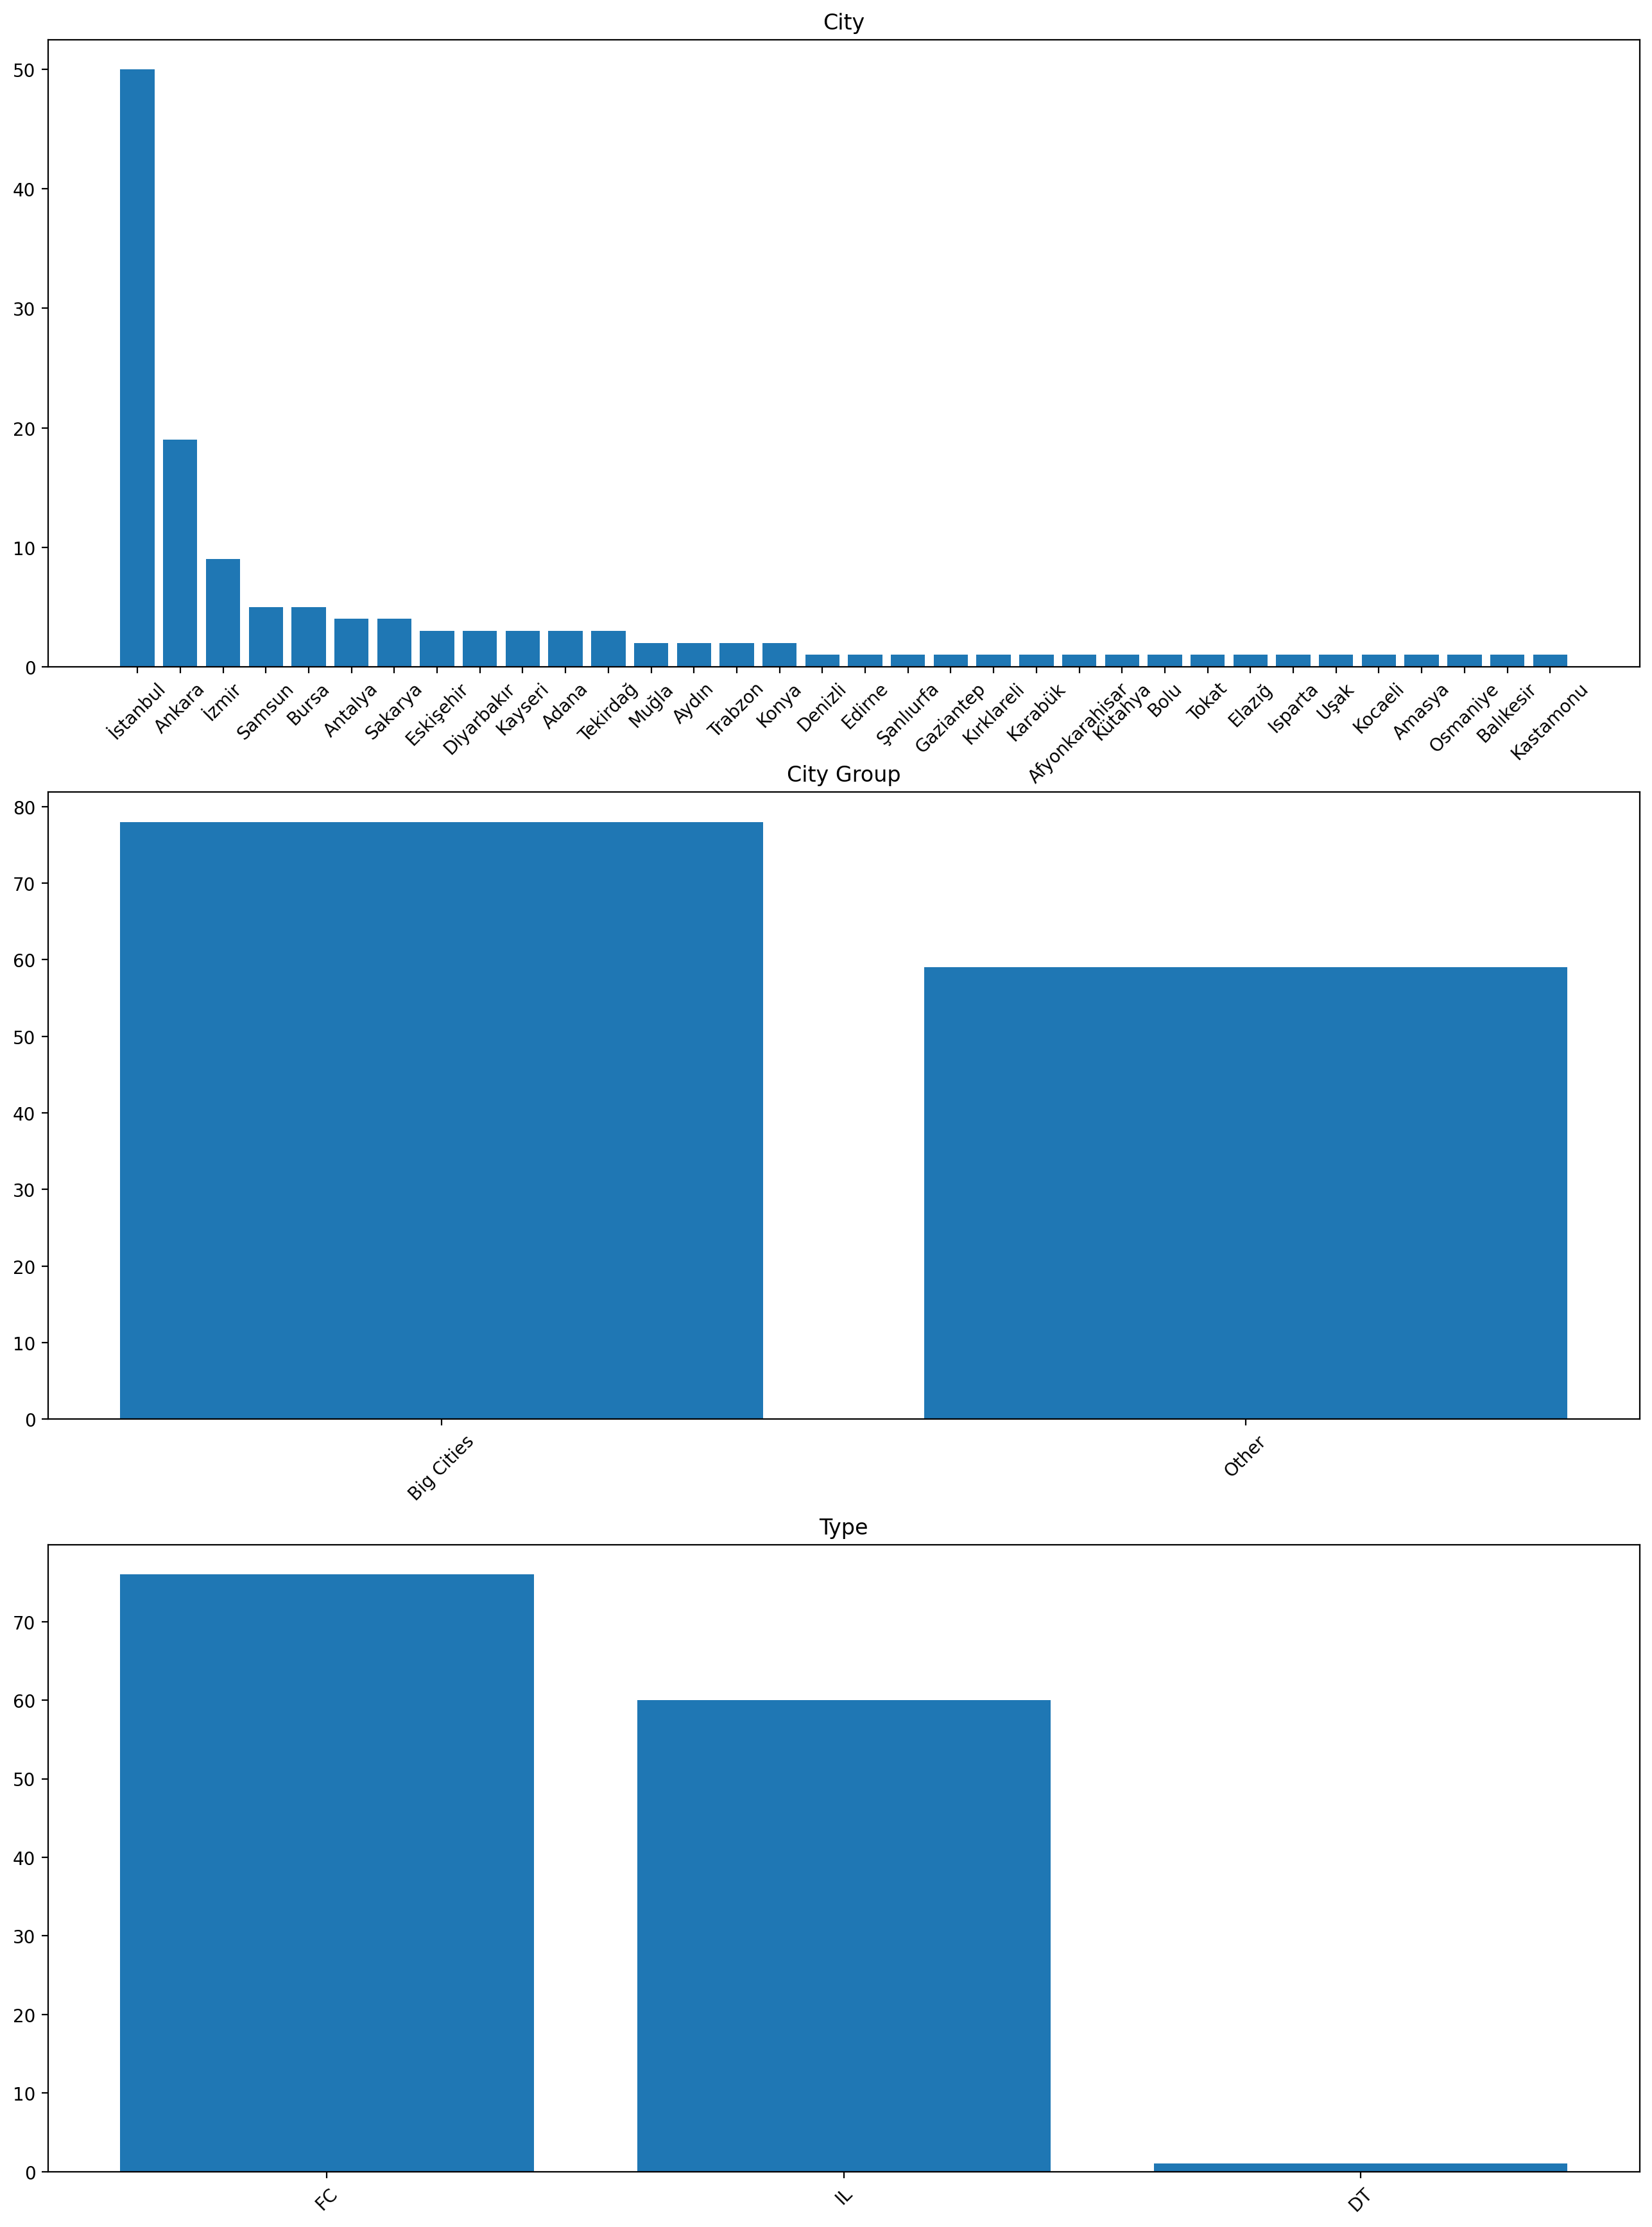

In [214]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,
                                 ncols=1,
                                 figsize=[16,22],
                                 dpi=200)
axes = [ax1,ax2,ax3]
data = [res_count_by_city,res_count_by_city_grp,res_count_by_type]
plot_title = ['City','City Group','Type']

for i in range(len(axes)):
    axes[i].bar(x=data[i]['index'],
                height=data[i][plot_title[i]])
    axes[i].set_xticklabels(data[i]['index'], rotation=45)
    axes[i].set_title(plot_title[i])

plt.show()

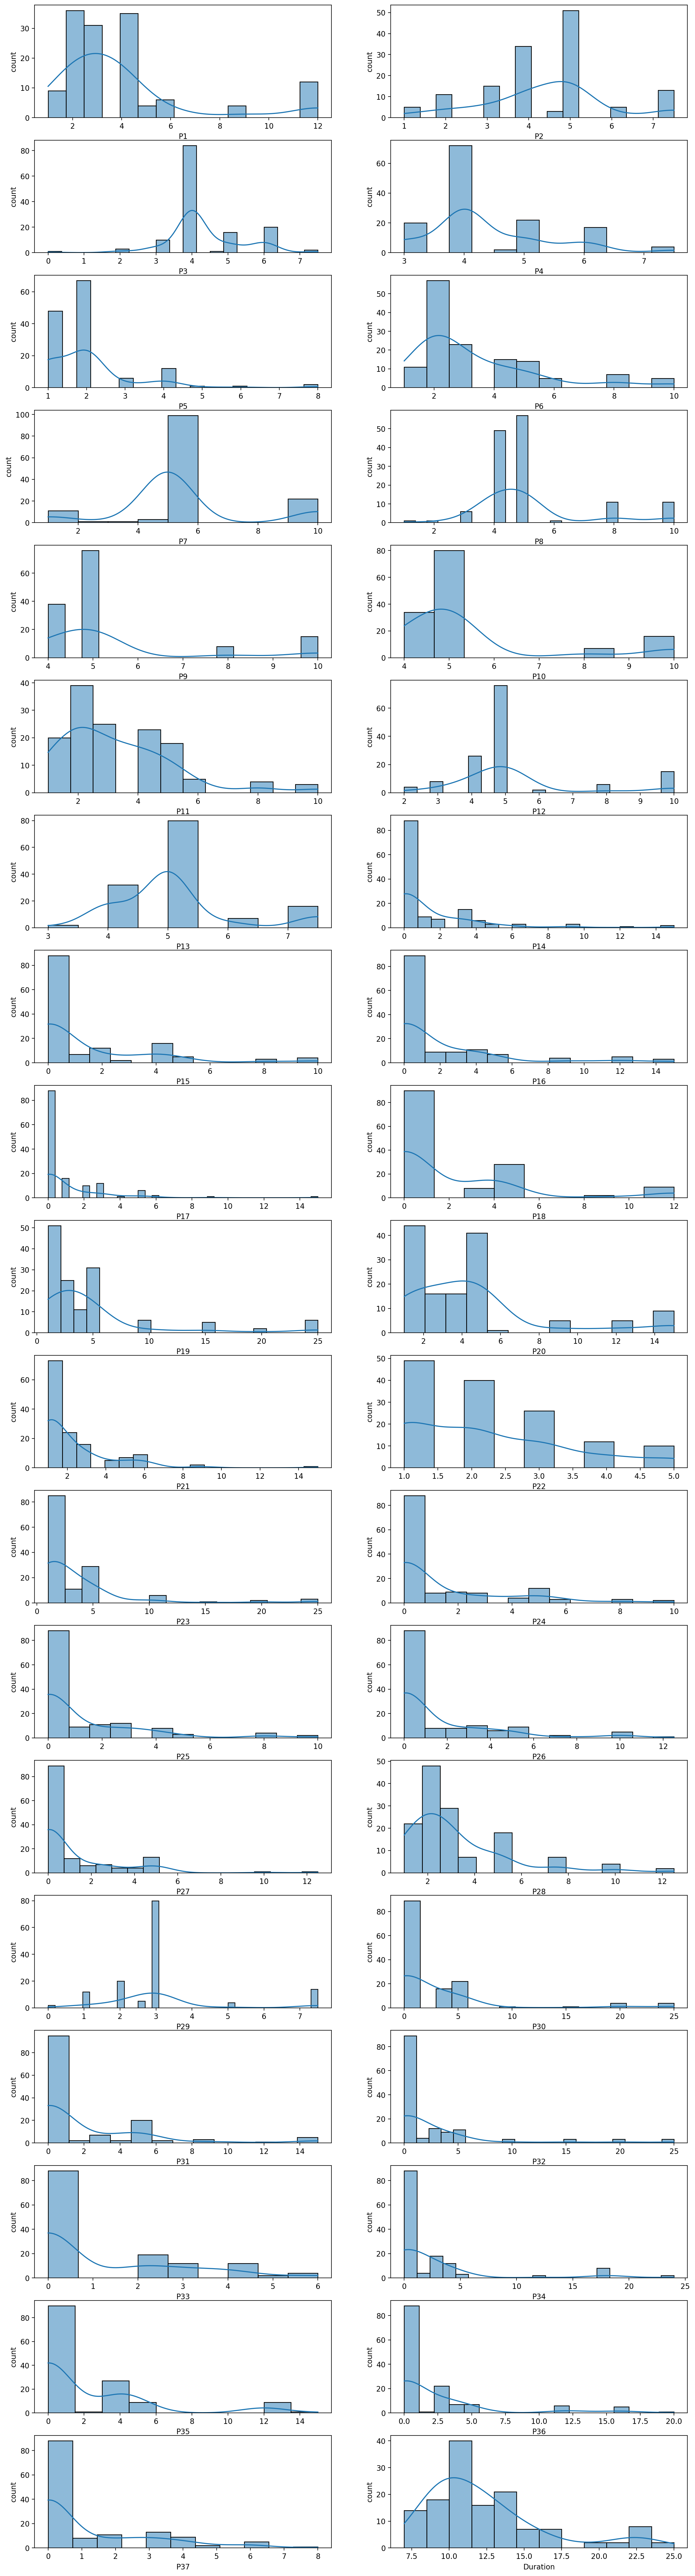

In [220]:
num_feature = np.array(numerical_feature.columns.values)
fig,axes = plt.subplots(nrows=19,
                        ncols=2,
                        figsize=[16,64],
                        dpi=200)
for feature, subplot in zip(num_feature,axes.flatten()):
    sns.histplot(data=train[feature],
                 kde=True,
                 ax=subplot)
    subplot.set_xlabel(feature)
    subplot.set_ylabel('count')

plt.show()